# Polytropes

Figure 6.1 from Chapter 6 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge University Press.

Plot of polytropes. 

The combined assumptions of mass conservation and hydrostatic equilibrium lead to a relation
between pressure and mass density in a star:
$$
-4\pi G \rho = {1 \over r^2} {d \over dr} \left( {r^2 \over \rho} {dP \over dr} \right)
$$
This is a single equation in two unknowns, $P$ and $\rho$. To integrate this equation to find $P(r)$ and $\rho(r)$, we need to assume an equation of state that tells us $P$ as a
function of $\rho$.  

One interesting case to consider is the **Polytropic Equation of State**:
$$
P = K_n \rho^{1+1/n}
$$
where $n$ is the **polytropic index**.  The polytropic index is a way of quantifying the "stiffness" of the
equation of state: $n=0$ corresponds to an infinitely "stiff" gas with a constant density $\rho$ throughout, and
as $n$ increases, the equation of state is increasingly "soft" (a smaller change in $P$ is needed to make a
given change in $\rho$, thus "soft" can be read as "compresssible").

The differential equation for $P$ and $\rho$ for polytropic equiations of state can be recast in dimensionless form as the **Lane-Emden Equation** given a polytropic index $n$:

$${1 \over \xi^2} {d \over d\xi} \left( \xi^2 {d\theta \over d\xi} \right) = - \theta^n$$

where $\xi$ is a dimensionless radius and $\theta$ is a dimensionless density (see the text for the full derivation).

The Lane-Emden Equation has no general analytic solutions and must be solved numerically. We pre-compute
the models shown here.

In [5]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [6]:
plotFile = 'Fig6_1.png' 

# graphic aspect ratio = width/height

aspect = 2.4

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 7
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Polytrope Model Files

The models are ASCII 4-column tables with the following data
 * $\xi$
 * $\theta$
 * $r/R_\ast$
 * $\rho/\rho_\ast$

Files are stored in the LaneEmden/ folder, with names like "poly_n1.5.txt" for an $n=1.5$ polytrope model.

In [7]:
dataRoot = 'LaneEmden/poly_n'

nList = [0.0,1.5,3.0]
ltype = ['-',':','--']

# initialize empty dictionaries with the data arrays to plot

xi = {}
theta = {}
r = {} # r/R_*
rho = {} # rho/rho_c

# Load the arrays 

for n in nList:
    polyFile = f'{dataRoot}{n:.1f}.txt'
    data = pd.read_csv(polyFile,sep=r'\s+',comment='#')
    xi[n] = np.array(data['xi'])
    theta[n] = np.array(data['theta'])
    r[n] = np.array(data['r/R*'])
    rho[n] = np.array(data['rho/rho*'])


## Figure 6.1

Two-panel side-by-side plot.  Left: $\theta$ vs $\xi$, Right: $\rho/\rho_C$ vs $r/R_\star$

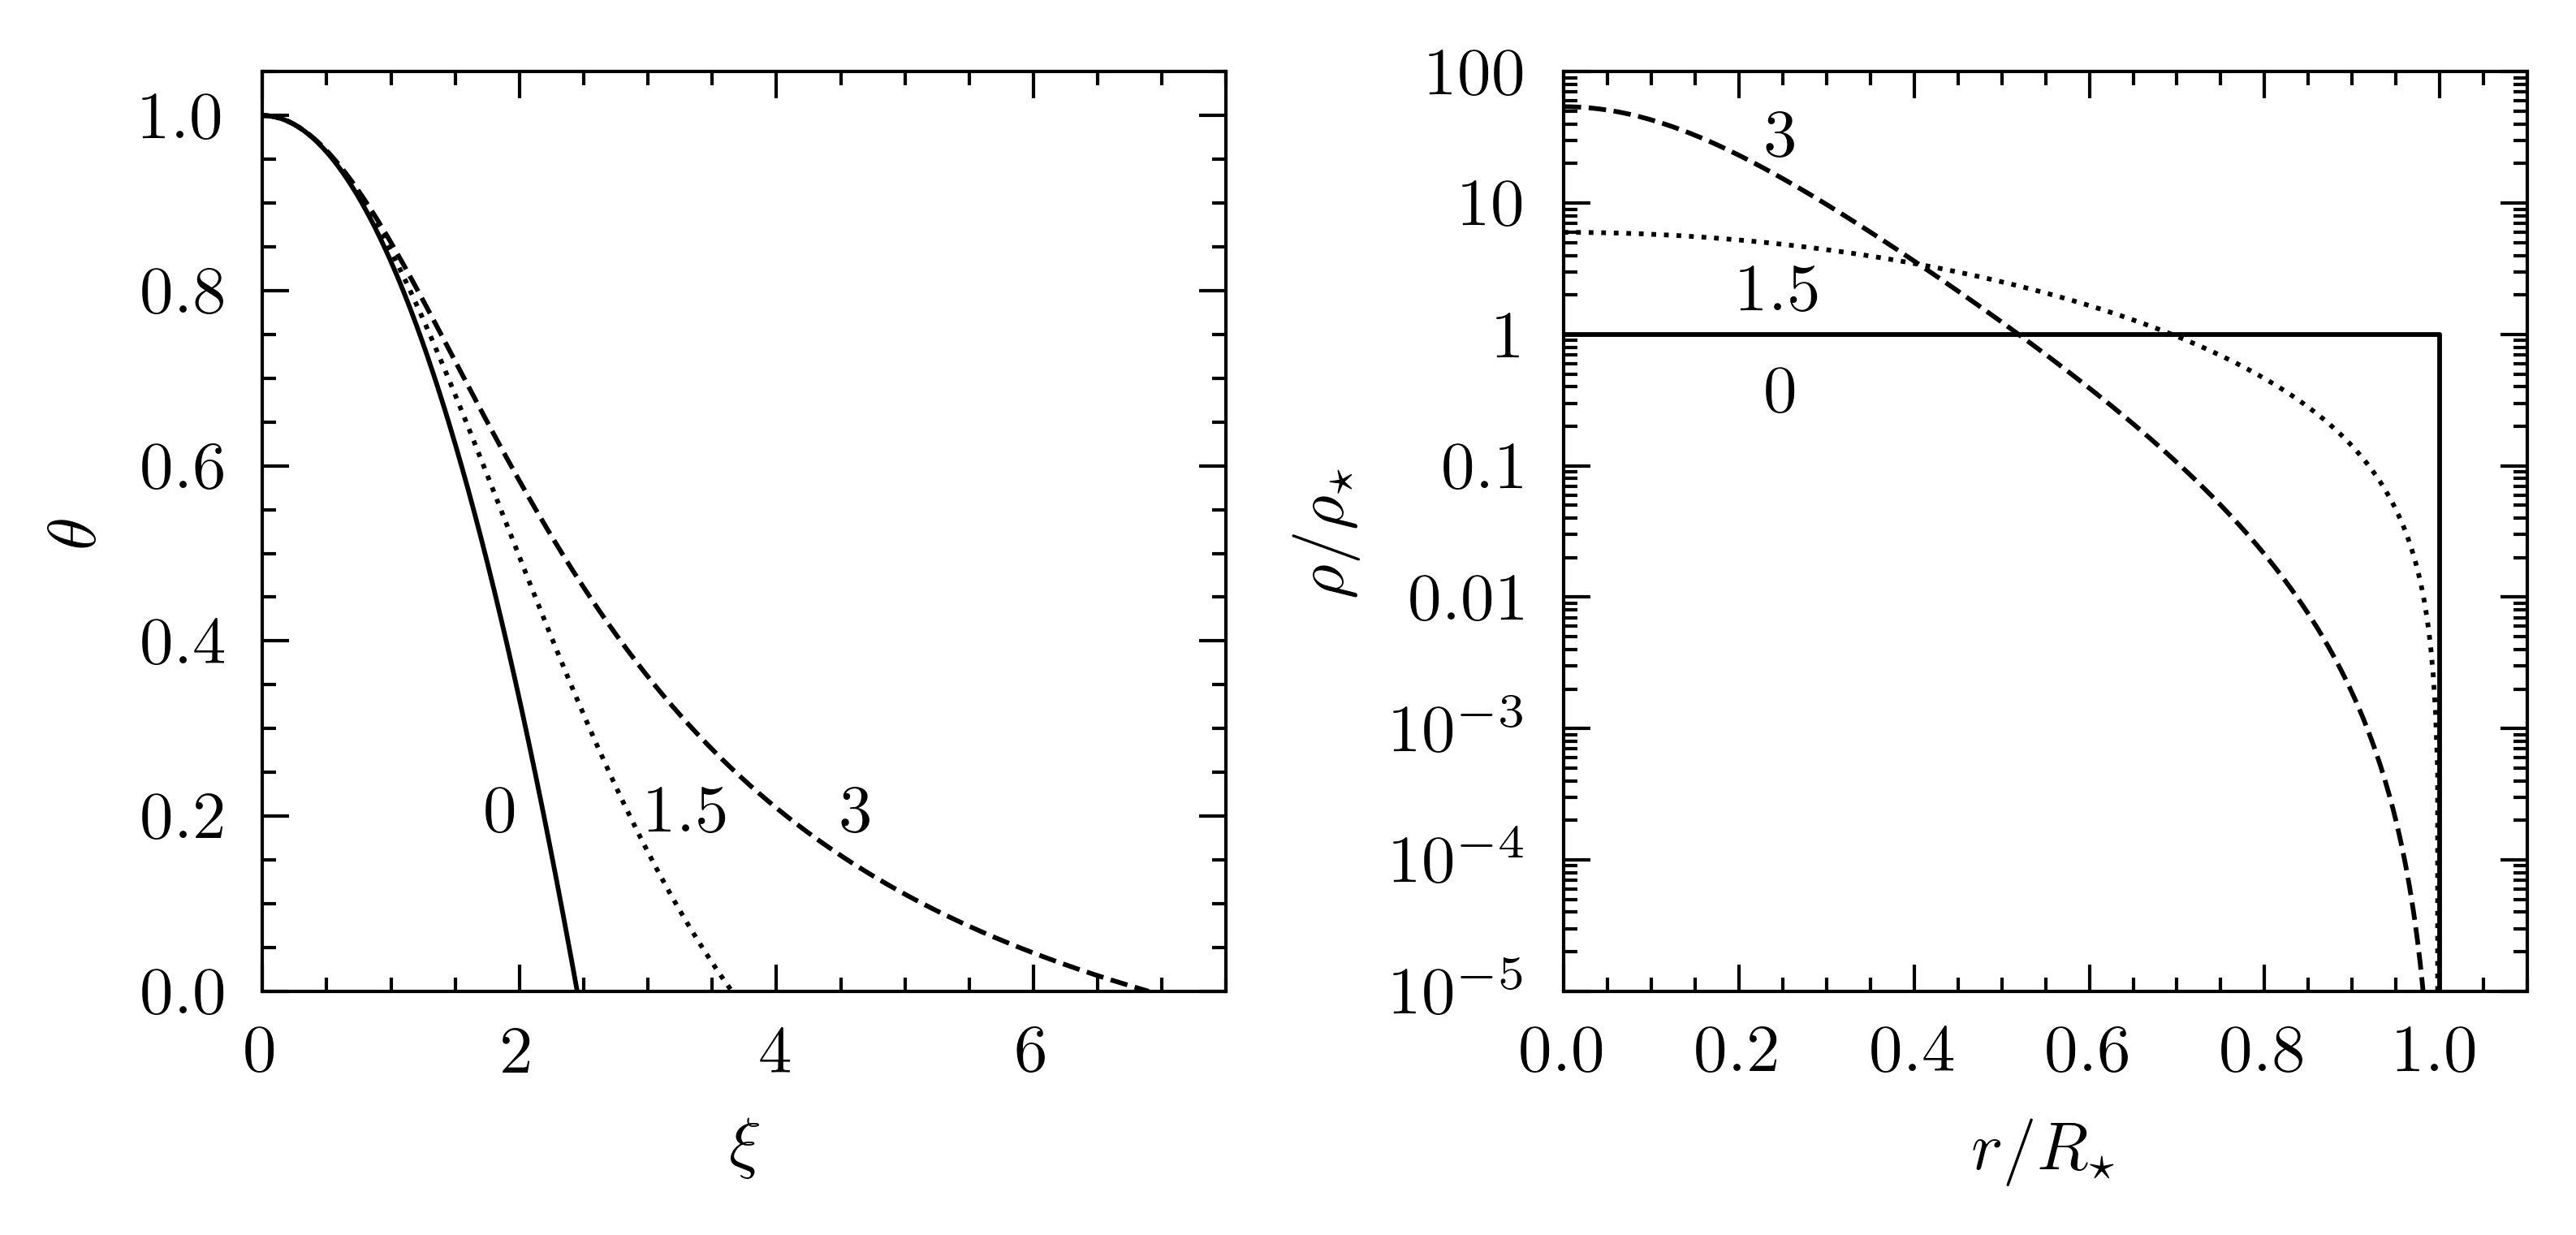

In [8]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)

fig.subplots_adjust(wspace=0.35, hspace=0)

# Left Panel: theta vs xi

xiMin = 0
xiMax = 7.5
thMin = 0
thMax = 1.05

ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
ax1.set_xlim(xiMin,xiMax)
ax1.set_xlabel(r'$\xi$',fontsize=axisFontSize)
ax1.xaxis.set_major_locator(MultipleLocator(2.0))
ax1.xaxis.set_minor_locator(MultipleLocator(0.5))
ax1.set_ylim(thMin,thMax)
ax1.set_ylabel(r'$\theta$',fontsize=axisFontSize)
ax1.yaxis.set_major_locator(MultipleLocator(0.2))
ax1.yaxis.set_minor_locator(MultipleLocator(0.05))

for i,n in enumerate(nList):
    ax1.plot(xi[n],theta[n],ls=ltype[i],color='black',lw=0.7)

# Label by hand because no simple algorithm

ax1.text(2.0,0.2,'0',color='black',ha='right',va='center',fontsize=10)
ax1.text(3.0,0.2,'1.5',color='black',ha='left',va='center',fontsize=10)
ax1.text(4.5,0.2,'3',color='black',ha='left',va='center',fontsize=10)
              
# Right Panel: rho/rho_C vs r/R_*

rMin = 0
rMax = 1.1
rhoMin = 1.0e-5
rhoMax = 100.0

ax2.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
ax2.set_xlim(rMin,rMax)
ax2.set_xlabel(r'$r/R_\star$',fontsize=axisFontSize)
ax2.xaxis.set_major_locator(MultipleLocator(0.2))
ax2.xaxis.set_minor_locator(MultipleLocator(0.05))
ax2.set_ylim(rhoMin,rhoMax)
ax2.set_ylabel(r'$\rho/\rho_\star$',fontsize=axisFontSize)
ax2.set_yscale('log')
ax2.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax2.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax2.yaxis.set_minor_formatter(NullFormatter())
ax2.set_yticks([1.0E-5,1.0E-4,0.001,0.01,0.1,1.0,10,100])
ax2.set_yticklabels([r'10$^{-5}$',r'10$^{-4}$',r'10$^{-3}$','0.01','0.1','1','10','100'])

for i,n in enumerate(nList):
    ax2.plot(r[n],rho[n],ls=ltype[i],color='black',lw=0.7)
    
# Label by hand because no simple algorithm

ax2.text(0.25,30,'3',color='black',ha='center',va='center',fontsize=10)
ax2.text(0.25,2,'1.5',color='black',ha='center',va='center',fontsize=10)
ax2.text(0.25,0.2,'0',color='black',ha='center',va='bottom',fontsize=10)

# Make the plot

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')